In [18]:
import seaborn as sns; sns.set()
from sklearn.datasets import load_digits
digits = load_digits()

images = digits.images
targets = digits.target

In [19]:
images.shape

(1797, 8, 8)

## Isolation

In [20]:
X = images.reshape(-1, 64)

In [21]:
Y = targets

In [22]:
import matplotlib.pyplot as plt

In [23]:
def show_example(index):
  print(targets[index])
  plt.imshow(images[index], cmap="binary")
  plt.show()
  print()

## Split

In [26]:
from sklearn.model_selection import train_test_split as TTS

X_tr, X_te, Y_tr, Y_te = TTS(X,Y,
                             stratify=Y,
                             random_state=777,
                             train_size=0.8)
for each in [X_tr, X_te, Y_tr, Y_te]:
  print(each.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


## Pipeline - mis en place

In [29]:
# pipeline éléments 
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN

# pipeline Matriaux
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [31]:
# Créer la pipeline
pipeline_details = [('pca', PCA(random_state=42)),
                    ('knn', KNN())]

pipeline = Pipeline(pipeline_details)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=42, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [36]:
# Parametrer la Gris Search
hyperparameters = {}
hyperparameters['pca__n_components'] = list(range(1, 64+1, 3))
hyperparameters['knn__n_neighbors'] = [1,3,5,9,21]

In [37]:
# Créer la grid search
hyperparameters_search = GridSearchCV(pipeline,
                                      hyperparameters,
                                      scoring='accuracy',
                                      cv=5)
hyperparameters_search

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             wei

## Lancer la recherche

In [39]:
# go ! 
hyperparameters_search.fit(X_tr, Y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             wei

## Récolter résultats

In [40]:
hyperparameters_search.best_score_

0.985387630662021

In [41]:
hyperparameters_search.best_params_

{'knn__n_neighbors': 3, 'pca__n_components': 43}

## Ré-entrainer un modèle avec la meilleur config (estimée) sur la totalité du TrainSet !

In [42]:
pca = PCA(n_components=43)
knn = KNN(n_neighbors=3)

pca.fit(X_tr)
X_tr_PCA = pca.transform(X_tr)
X_te_PCA = pca.transform(X_te)

knn.fit(X_tr_PCA, Y_tr)
predictions = knn.predict(X_te_PCA)

In [43]:
accuracy = lambda p,y: (p==y).sum()/p.shape[0]
"TEST ACCURACY: ", accuracy(predictions, Y_te)

('TEST ACCURACY: ', 0.9944444444444445)

In [45]:
train_preds = knn.predict(X_tr_PCA)
"TRAIN ACCURACY: ", accuracy(train_preds, Y_tr)

('TRAIN ACCURACY: ', 0.9916492693110647)

## Confusion Matrix

In [46]:
(train_preds, Y_tr)
(predictions, Y_te)

from sklearn.metrics import confusion_matrix

labels = range(10)
cm_train = confusion_matrix(train_preds, Y_tr, labels=labels)
cm_test = confusion_matrix(predictions, Y_te, labels=labels)

In [47]:
cm_train

array([[142,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 146,   0,   0,   0,   0,   0,   0,   2,   1],
       [  0,   0, 142,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 145,   0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0, 145,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0, 143,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1, 145,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0, 142,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 137,   1],
       [  0,   0,   0,   0,   0,   1,   0,   1,   0, 138]])

In [48]:
cm_test

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 35]])

In [51]:
import pandas as pd

def show_cm(cm, labels):
  df_cm = pd.DataFrame(cm,labels, labels)
  sns.heatmap(df_cm, annot=True)
  plt.show()

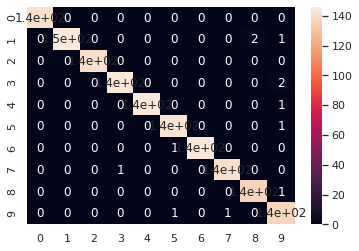

In [52]:
show_cm(cm_train, labels)